# Module 5 Assignment

#### Run multiple regression on the data set provided.


In [35]:
# import library
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# read file
def read_file(filename, sheetname):
    df = pd.read_excel(filename, sheet_name = sheetname, engine='openpyxl')
    return df

# Regression function generates OLS Regression results
def reg_sm(y, x):
    x = np.array(x).T
    x = sm.add_constant(x)
    results = sm.OLS(endog=y, exog=x).fit()
    return results

def main():
    # Identify File Location and Sheet Information
    filename = 'MCIS540-M5-Data.xlsx'
    sheetname = 'mcis540_data'

    #Call File Read-In Function and return a dataframe
    df = read_file(filename, sheetname)

    # Assign Multiple X variables and single Y variable
    x1 = list(df['Insider_Ownership']) # Independent X Variable 1
    x2 = list(df['Debt_Ratio']) # Independent X Variable 2
    y = list(df['Dividend_Payout']) # Dependent Y Variable
    
    # Append X data into nested list for use in regression function
    x_multi = []
    x_multi.append(x1)
    x_multi.append(x2)

    # Call Regression Function passing appropriate data for Mulitple Regression
    print(reg_sm(y, x_multi).summary())

if __name__ == '__main__':
    main()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     4.475
Date:                Sun, 25 Apr 2021   Prob (F-statistic):             0.0496
Time:                        23:08:00   Log-Likelihood:                -22.544
No. Observations:                  11   AIC:                             51.09
Df Residuals:                       8   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0608      2.668      6.020      0.0

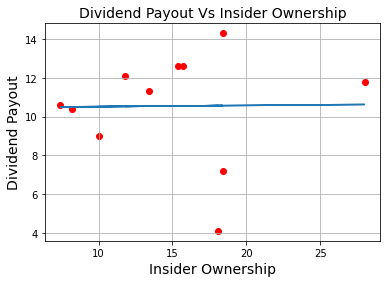

In [40]:
# Generate a Scatter Plot for Insider Ownership Vs Dividend Payout
plt.scatter(df['Insider_Ownership'], df['Dividend_Payout'], color='red')
plt.title('Dividend Payout Vs Insider Ownership', fontsize=14)
plt.xlabel('Insider Ownership', fontsize=14)
plt.ylabel('Dividend Payout', fontsize=14)
plt.grid(True)
m, b = np.polyfit(df['Insider_Ownership'], df['Dividend_Payout'], 1)
plt.plot(df['Insider_Ownership'], m*df['Insider_Ownership'] + b)
plt.show()

#### There is a very weak correlation between Insider Ownership and Dividend Payout

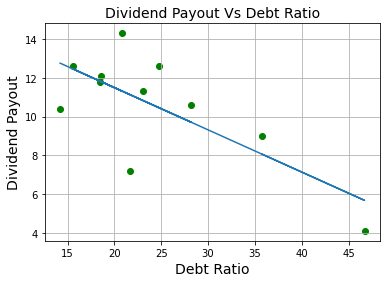

In [41]:
# Generate a Scatter Plot for Debt Ratio Vs Dividend Payout
plt.scatter(df['Debt_Ratio'], df['Dividend_Payout'], color='green')
plt.title('Dividend Payout Vs Debt Ratio', fontsize=14)
plt.xlabel('Debt Ratio', fontsize=14)
plt.ylabel('Dividend Payout', fontsize=14)
m, b = np.polyfit(df['Debt_Ratio'], df['Dividend_Payout'], 1)
plt.plot(df['Debt_Ratio'], m*df['Debt_Ratio'] + b)
plt.grid(True)
plt.show()

#### There is a stronger correlation between Debt Ratio vs Dividend Payout

#### Note: 
#### The Adjusted R-Squared value for this particular data set is 0.410, this implies that the fit model is very poor. 
#### Additionally the Kurtosis Test used for checking normality within the SciPy package has thrown an error because typically the number of data points needs to be larger than 20 for accurate results.